# EDA

datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter   
holiday - whether the day is considered a holiday  
workingday - whether the day is neither a weekend nor holiday  
weather -   
    1: Clear, Few clouds, Partly cloudy, Partly cloudy   
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist   
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds   
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog    
temp - temperature in Celsius   
atemp - "feels like" temperature in Celsius   
humidity - relative humidity  
windspeed - wind speed  
casual - number of non-registered user rentals initiated  
registered - number of registered user rentals initiated  
count - number of total rentals  

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
train = pd.read_csv("data/train.csv", parse_dates = ['datetime'])
train.shape

(10886, 12)

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [42]:
train.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [5]:
train.describe() ## 의미 없는 듯 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
train.isnull().sum() ## null 은 없음 

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
train.workingday.count()

10886

In [16]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

In [17]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [20]:
plt.rcParams['font.family'] = 'AppleGothic'

[Text(0, 0.5, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

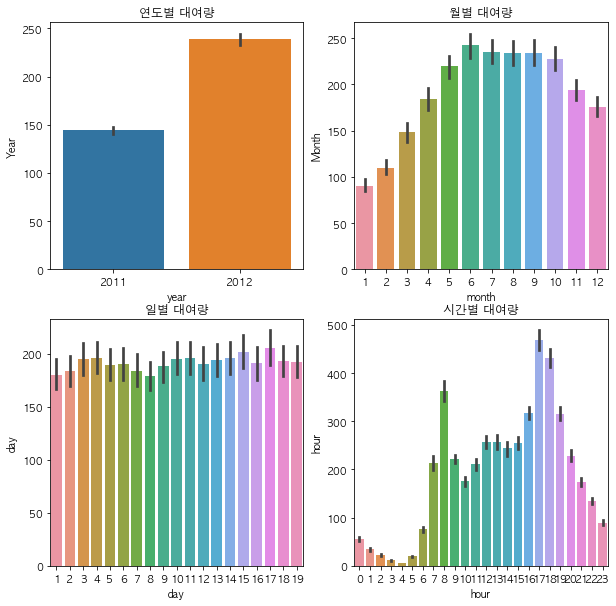

In [25]:
## year, month, day, hour
figure, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2)
figure.set_size_inches(10,10)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)

ax1.set(ylabel = 'Year', title = '연도별 대여량')
ax2.set(ylabel = 'Month', title = '월별 대여량')
ax3.set(ylabel = 'day', title = '일별 대여량')
ax4.set(ylabel = 'hour', title = '시간별 대여량')

- year, day 의미 없어보임
- month는 여름에 많이 탄다
- hour은 출퇴근 시간에 많아보임

In [35]:
# holiday - whether the day is considered a holiday
# workingday - whether the day is neither a weekend nor holiday
print(len(train[(train.holiday==0) & (train.workingday==1)]) / len(train) * 100 , "%") ## 평일
print(len(train[(train.holiday==0) & (train.workingday==0)]) / len(train) * 100 , "%") ## 주말
print(len(train[(train.holiday==1) & (train.workingday==0)]) / len(train) * 100 , "%") ## 공휴일
print(len(train[(train.holiday==0) & (train.workingday==0)]) / len(train) * 100 + len(train[(train.holiday==1) & (train.workingday==0)]) / len(train) * 100 , "%") ## 공휴일
print(len(train[(train.holiday==1) & (train.workingday==1)]) / len(train) * 100 , "%") ## X

## -> 평일에 타는 날이 제일 많다
## holiday 일자가 적기때문에 의미가 있는지는....

68.08745177291935 %
29.05566783024068 %
2.856880396839978 %
31.912548227080656 %
0.0 %


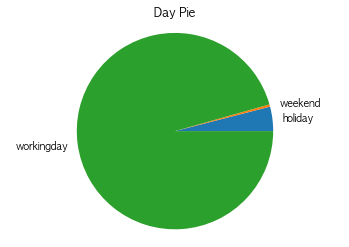

In [41]:
labels = ['holiday', 'weekend', 'workingday']
sizes = [len(train[(train.holiday==1) & (train.workingday==0)]), len(train[(train.holiday==0) & (train.workingday==0)]) / len(train) * 100, len(train[(train.holiday==0) & (train.workingday==1)])]

fig,ax = plt.subplots()
ax.pie(sizes,
      labels = labels)

ax.axis('equal') 
ax.set_title('Day Pie')


plt.show()

In [45]:
### 0 is Monday and 6 is Sunday
train['dayofweek'] = train.datetime.dt.dayofweek
train.dayofweek.value_counts() ## -> 요일별로 확인하기

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

[Text(0, 0.5, 'dayofweek'), Text(0.5, 1.0, '요일분석')]

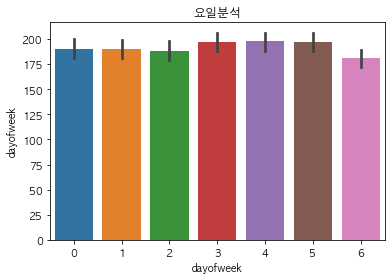

In [49]:
fig,ax = plt.subplots()
sns.barplot(data = train, x = 'dayofweek', y='count', ax = ax)
ax.set(ylabel='dayofweek', title = '요일분석') 
### 요일도 크게 상관없이 타고 있음

In [50]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


<AxesSubplot:xlabel='hour', ylabel='count'>

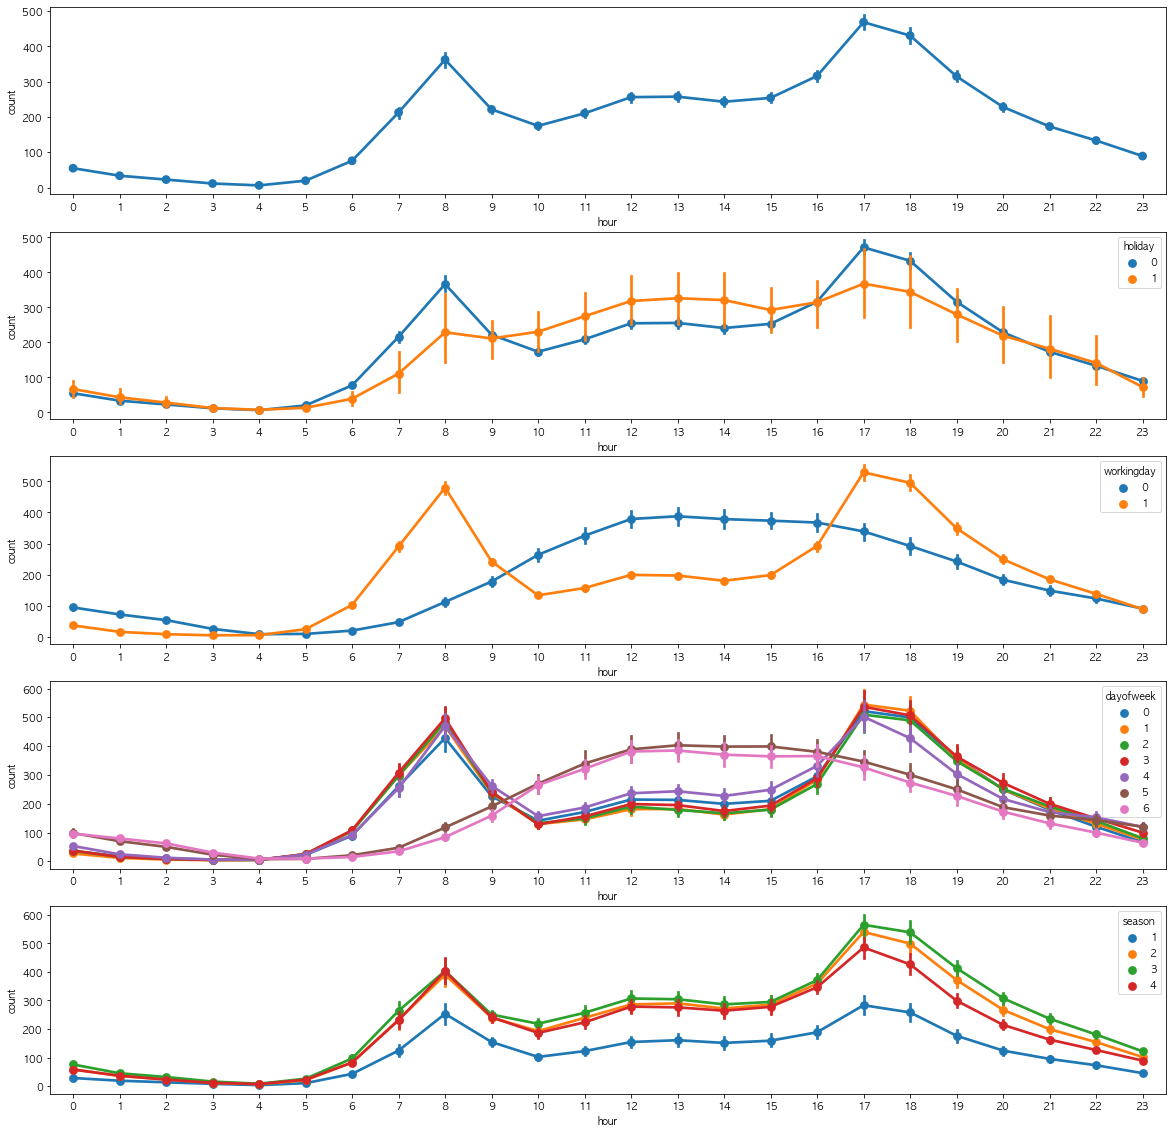

In [55]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1)
fig.set_size_inches(20,20)
sns.pointplot(data = train, x = 'hour', y = 'count', ax = ax1)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'holiday', ax = ax2)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday', ax = ax3)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek', ax = ax4)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'season', ax = ax5)

## 평일은 출퇴근시간, 휴일은 오후경에 많이 탄다